<a href="https://colab.research.google.com/github/eduardez/Machine-Learning-ESI/blob/K-means/ELM_Iquitos(00_03)L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Introduction

##1.1 - The features in the dataset

General

Var | Meaning
--- | ---
city | Ciudad
week_start_date | Fecha de inicio de la semana

NOAA's GHCN daily climate data weather station measurements

Var | Meaning
--- | ---
station_max_temp_c | Maximum temperature
station_min_temp_c | Minimum temperature
station_avg_temp_c | Average temperature
station_precip_mm | Total precipitation
station_diur_temp_rng_c | Diurnal temperature range


PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

Var | Meaning
--- | ---
precipitation_amt_mm | Total precipitation

NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

Var | Significado
--- | ---
reanalysis_sat_precip_amt_mm | Total precipitation
reanalysis_dew_point_temp_k | Mean dew point temperature (Temperatura media del rocío)
reanalysis_air_temp_k | Mean air temperature
reanalysis_relative_humidity_percent | Mean relative humidity
reanalysis_specific_humidity_g_per_kg | Mean specific humidity
reanalysis_precip_amt_kg_per_m2 | Total precipitation (kg/m2)
reanalysis_max_air_temp_k | Maximum air temperature
reanalysis_min_air_temp_k | Minimum air temperature
reanalysis_avg_temp_k | Average air temperature
reanalysis_tdtr_k | Diurnal temperature range


Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements 

Var | Significado
--- | ---
ndvi_se | Pixel southeast of city centroid
ndvi_sw | Pixel southwest of city centroid
ndvi_ne | Pixel northeast of city centroid
ndvi_nw | Pixel northwest of city centroid

## 1.2 - Objetives

The purpose of this work is to explore the environmental data collected by various U.S.
Federal Government Agencies from two cities ( San Juan, Puerto Rico and Iquitos, Peru) to
gain a better understanding of the Denge Spread Phenomena.
These data are from a competition of the site DrivenData 1
. Training data will be used 2
.
The overall objective is to **use unsupervised learning techniques to make a preliminary exploration of the data and to extract conclusions from discarded elements, etc**. The specific
objectives are as follows:
1. Identification of outliers elements (weeks) in the dataset
2. Use clustering algorithms to identify groups and characterize them.
3. (optional) Feature Selection using clustering algorithms

### **The ELM group has been assigned the city of Iquitos (2000-2003)**



##1.3 - Imports and data load

In [ ]:
# data load and manipulation
from google.colab import files
import io
# dataframes library
import pandas as pd
# visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# basic operations
import numpy as np
from numpy import corrcoef, transpose, arange
import itertools
# normalización
from sklearn import preprocessing 
#pca
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.decomposition import FastICA

We use ours GitHub Repository to store the data for automatic loading 😎

In [ ]:
raw_dataset_features = pd.read_csv('https://raw.githubusercontent.com/eduardez/Machine-Learning-ESI/Limpio/dengue_features_train.csv',index_col=[0,1,2])
raw_dataset_labels = pd.read_csv('https://raw.githubusercontent.com/eduardez/Machine-Learning-ESI/Limpio/dengue_labels_train.csv',index_col=[0,1,2])
raw_dataset_features

week_start_date  ...  station_precip_mm
city year weekofyear                  ...                   
sj   1990 18              1990-04-30  ...               16.0
          19              1990-05-07  ...                8.6
          20              1990-05-14  ...               41.4
          21              1990-05-21  ...                4.0
          22              1990-05-28  ...                5.8
...                              ...  ...                ...
iq   2010 21              2010-05-28  ...               27.0
          22              2010-06-04  ...               36.6
          23              2010-06-11  ...                7.4
          24              2010-06-18  ...               16.0
          25              2010-06-25  ...               20.4

[1456 rows x 21 columns]

#2 - Initial exploration and preprocessing

##2.1 -  Year filter

In this first part we have to focus on the period of time between 2000 and 2003. So we have to apply a filter to achieve this task using pandas library.

In [ ]:
dataset_features = raw_dataset_features.loc['iq']
dataset_features = dataset_features.loc[2000:2003]

dataset_labels = raw_dataset_labels.loc["iq"]
dataset_labels = dataset_labels.loc[2000:2003]
dataset_features

week_start_date  ...  station_precip_mm
year weekofyear                  ...                   
2000 26              2000-07-01  ...                3.0
     27              2000-07-08  ...               55.6
     28              2000-07-15  ...               38.1
     29              2000-07-22  ...               30.0
     30              2000-07-29  ...                4.0
...                         ...  ...                ...
2003 48              2003-11-26  ...               26.2
     49              2003-12-03  ...              138.0
     50              2003-12-10  ...               47.4
     51              2003-12-17  ...               66.8
     52              2003-12-24  ...              185.7

[182 rows x 21 columns]

## 2.2 - Dimensionality Reduction


## 2.2.1 - Correlation





It is important to remove redundancy. For example, week_start_date could be inferred from weekofyear and year.



In [ ]:
dataset_features.drop("week_start_date", axis = 1, inplace = True)

We can use correlation to do feature reduction, those perfectly correlated variable are truly redundant in the sense that no additional information is gained by adding them.

Before we start with the correlation other important task is to treat the lost values in the data, since if we don't do it, our work will be very difficult.

We have to see if there is any missing data.

In [ ]:
pd.isnull(dataset_features).sum()

ndvi_ne                                  1
ndvi_nw                                  1
ndvi_se                                  1
ndvi_sw                                  1
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       6
station_diur_temp_rng_c                  6
station_max_temp_c                       0
station_min_temp_c                       1
station_precip_mm                        3
dtype: int64

In [ ]:
pd.isnull(dataset_features).any()

ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                       False
station_min_temp_c                        True
station_precip_mm                         True
dtype: bool

In [ ]:
pd.isnull(dataset_labels).any()

total_cases    False
dtype: bool

We will process them automatically by completing them with the ffill method (with the previous value)

Pandas dataframe.ffill() function is used to fill the missing value in the dataframe. 'ffill' stands for 'forward fill' and will propagate last valid observation forward.

In [ ]:
dataset_features.fillna(method='ffill', inplace=True)

We fuse both datasets

In [ ]:
dataset_features['total_cases'] = dataset_labels.total_cases

Text(0.5, 1.0, 'Iquitos 2000-2003 Variable Correlations')

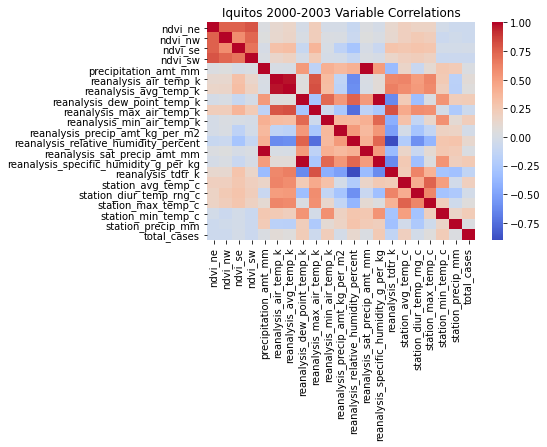

In [ ]:
dataset_correlations = dataset_features.corr()
dataset_corr_heat = sns.heatmap(dataset_correlations,cmap='coolwarm',xticklabels=True, yticklabels=True)

plt.title('Iquitos 2000-2003 Variable Correlations')

With the next code, we are going to see which features are perfectly (or almost) correleated.

In [ ]:
corr_matrix = dataset_features.corr()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
for index, value in sol.items():
  if value>0.80:
    print(index, value)
  

('precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm') 1.0
('reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg') 0.9978421090828513
('reanalysis_air_temp_k', 'reanalysis_avg_temp_k') 0.9737743542998152
('reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k') 0.8213536259982039
('reanalysis_max_air_temp_k', 'reanalysis_tdtr_k') 0.8088912148464726
('ndvi_ne', 'ndvi_sw') 0.8040389769615475


###Conclusions of correlation:

###Precipitation_amt_mm and reanalysis_sat_precip_amt_mm **1.0**: 

      
> This features are perfectly correlated, so one of them are redundant, no matter which one we choose. It´s not a surprise to see here these features because both represent total precipitation on the same city.

###  reanalysis_dew_point_temp_k and reanalysis_specific_humidity_g_per_kg **0.9978**:

>The dew point is the temperature at which the absolute (absolute and specific are the same but they use different measure metrics) humidity is equal to the amount of water that the air can actually hold, or the temperature at which the absolute humidity equals the relative humidity of 100%.

### reanalysis_air_temp_k and reanalysis_avg_temp_k **0.9737**:

>Average temperature and air temperature are highly correlated too.







**We are going to drop those that have less correlation with total_cases**

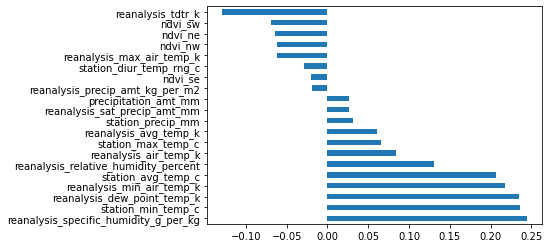

In [ ]:
(dataset_correlations
     .total_cases
     .drop('total_cases')
     .sort_values(ascending=False)
     .plot
     .barh())

Those features are going to be precipitation_atm_mm, reanalysis_dew_point_temp_k and reanalysis_air_temp_k.



In [ ]:
dataset_features.drop("precipitation_amt_mm", axis = 1, inplace = True)
dataset_features.drop("reanalysis_dew_point_temp_k", axis = 1, inplace = True)
dataset_features.drop("reanalysis_air_temp_k", axis = 1, inplace = True)

print(dataset_features)

                  ndvi_ne   ndvi_nw  ...  station_precip_mm  total_cases
year weekofyear                      ...                                
2000 26          0.192886  0.132257  ...                3.0            0
     27          0.216833  0.276100  ...               55.6            0
     28          0.176757  0.173129  ...               38.1            0
     29          0.227729  0.145429  ...               30.0            0
     30          0.328643  0.322129  ...                4.0            0
...                   ...       ...  ...                ...          ...
2003 48          0.274900  0.245200  ...               26.2            2
     49          0.400343  0.318057  ...              138.0            3
     50          0.358629  0.244350  ...               47.4            6
     51          0.192667  0.224400  ...               66.8            5
     52          0.285078  0.230656  ...              185.7            1

[182 rows x 18 columns]


## 2.2.2 - PCA (Principal Component Analysis)

In [ ]:
pca_dataset_features = dataset_features.copy()

The Principal Component Analysis (PCA) procedure is a dimension reduction technique that projects the data on k dimensions by maximizing the variance of the data.

We use StandardScaler to normalize the data.

CUIDADO CON QUE SCALER LO HACEMOS

In [ ]:
scaler = preprocessing.MinMaxScaler()
dengai = scaler.fit_transform(pca_dataset_features)

PCA() is a powerful tool that makes all the work for us. But *a great power comes with a great responsibility* and we should know what we are doing if we want to achieve our main aim, to reach good conclusions. For this reason, we have been studying PCA in depth, to really understands how it works and how to exploit it to our benefits. 



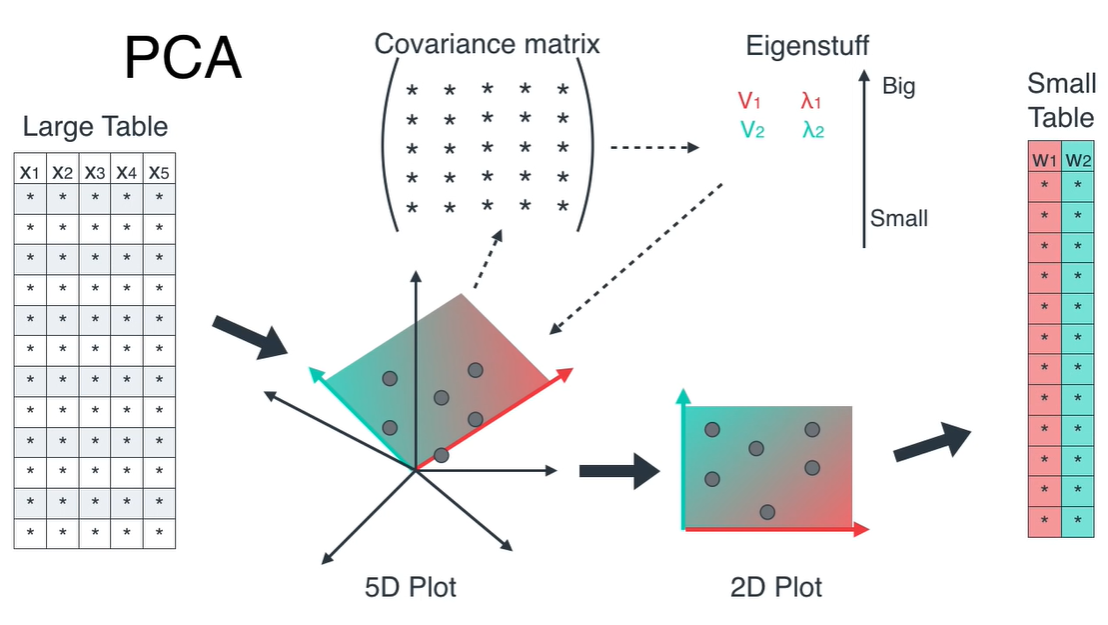

In [ ]:
from sklearn.decomposition import PCA
pca = PCA ()
X_pca = pca.fit_transform(dengai)
X_pca.shape

(182, 18)

In PCA each principal component has certain variance, that all together add up to 100% of the total variance. For each principal component, a ratio of its variance to the total variance is called the "proportion of explained variance".

In [ ]:
print(pca.explained_variance_ratio_)

[0.34751853 0.21136697 0.14734099 0.06089867 0.04231122 0.03222501
 0.02872904 0.02626742 0.02148294 0.01901849 0.01738556 0.01218396
 0.00961262 0.00881213 0.00644044 0.00430628 0.00338877 0.00071093]


How are we using PCA(), we don't have to worry about calculate the eigenvalues with the covariance matrix and linear transformations.

[Manual PCA](https://www.youtube.com/watch?v=g-Hb26agBFg)

**We were interested in seeing how much variance PCA is able to explain as you increase the number of components, in order to decide how many dimensions to ultimately keep or analyze.**

**With a higher explained variance, you are able to capture more variability in your dataset, which could potentially lead to better performance when training your model.**

In [ ]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Our dataset contains 18 features, but we only select the first 9 components, since they explain over 91% of the total variance.

In [ ]:
n_components=9
pca2 = PCA(n_components=n_components)
components = pca2.fit_transform(pca_dataset_features)

total_var = pca2.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Casos Totales'

fig = px.scatter_matrix(
    components,
    color=pca_dataset_features.total_cases,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

### **Conclusions of PCA**

As we can see in the last visualization, we can see a pattern between PC4 and PC5!, where there is a clear separation between weeks by total_cases.

The subplot between PC6 and PC9 is unable to separate them, so maybe it is just enough to use 5 components.

Other thing we can highlight is that there is some kind of outlier in PC1, PC2 and PC8. 



In [ ]:
n_components=5
pca2 = PCA(n_components=n_components)
components = pca2.fit_transform(pca_dataset_features)

total_var = pca2.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Casos Totales'

fig = px.scatter_matrix(
    components,
    color=pca_dataset_features.total_cases,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

We can also see that the first three components in a 3D plot.

In [ ]:
pca3 = PCA(n_components=3)
components = pca3.fit_transform(pca_dataset_features)

total_var = pca3.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=pca_dataset_features['total_cases'],
    title=f'Total Explained Variance (just 3 components): {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

# 3 - Clustering

In [30]:
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1])

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = str(dataset_features.iloc[i,:].name))
fig.show()

In [36]:
##@title Number of components {run: "auto"}
n_components = 9 #@param { type: "slider", min: 1, max: 17, step: 1}


In [ ]:
Se puede seleccionar distintos componentes pero lo recomendable son 9 componentes por lo dicho en el PCA

## 3.1 - Parametrization

In [37]:
# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

In [38]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

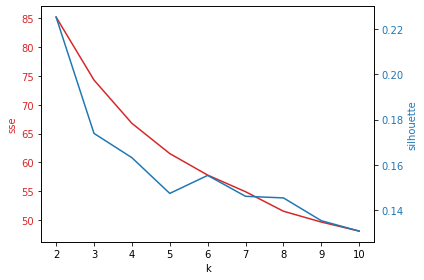

In [39]:
import matplotlib.pyplot as plt

x = [i for i in range(2,11)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [55]:
##@title Number of clusters {run: "auto"}
k = 4 #@param { type: "slider", min: 2, max: 11, step: 1}

In [56]:
print ("Number of clusters", k)
km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

Number of clusters 4


In [57]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.163
Distortion: 66.78


In [58]:
km.labels_

array([0, 3, 0, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 3, 0, 3, 3, 3, 3, 3, 1, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3,
       2, 3, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       3, 0, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 0], dtype=int32)

In [59]:
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = km.labels_)

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = str(dataset_features.iloc[i,:].name))
fig.show()

## 3.2 - Interpretation

In [62]:
dataset_features['kmeans_group'] = km.labels_

In [66]:
dataset_features[dataset_features['kmeans_group'] == 3]

ndvi_ne   ndvi_nw  ...  total_cases  kmeans_group
year weekofyear                      ...                           
2000 27          0.216833  0.276100  ...            0             3
     29          0.227729  0.145429  ...            0             3
     30          0.328643  0.322129  ...            0             3
     31          0.205529  0.190757  ...            0             3
2001 23          0.363567  0.181914  ...            0             3
     25          0.104100  0.108243  ...            1             3
     26          0.192300  0.275286  ...            0             3
     27          0.229083  0.193267  ...            0             3
     28          0.359717  0.311057  ...            0             3
     29          0.319500  0.205086  ...            0             3
     31          0.237117  0.195617  ...            0             3
2002 25          0.221271  0.173514  ...           11             3
     26          0.179171  0.279100  ...            3             3
     27          0.101543  0.126600  ...            7             3
     28          0.216020  0.235067  ...            7             3
     29          0.108043  0.072986  ...            4             3
     30          0.222500  0.263100  ...            5             3
     32          0.304117  0.278843  ...            7             3
     34          0.345425  0.313540  ...            4             3
2003 25          0.323700  0.275500  ...            4             3
     28          0.180271  0.162971  ...            2             3
     29          0.193571  0.168850  ...            5             3
     30          0.285814  0.163071  ...            1             3
     31          0.207786  0.156214  ...            1             3
     32          0.244371  0.174643  ...            0             3
     33          0.247114  0.171114  ...            0             3
     35          0.249586  0.212200  ...            0             3
     36          0.341700  0.286314  ...            2             3
     38          0.364486  0.260986  ...            3             3

[29 rows x 19 columns]

In [72]:
res = dataset_features[['total_cases', 'station_precip_mm', 'kmeans_group']].groupby('kmeans_group').describe()
res

total_cases                           ... station_precip_mm                      
                   count      mean       std  min  ...               25%    50%     75%    max
kmeans_group                                       ...                                        
0                   62.0  6.354839  8.440917  0.0  ...            37.350  59.90  97.175  543.3
1                   49.0  5.081633  7.976102  0.0  ...            27.200  45.30  75.000  284.4
2                   42.0  3.000000  6.293628  0.0  ...            11.475  33.05  59.400  159.0
3                   29.0  2.310345  2.928962  0.0  ...             9.900  26.30  68.100  117.0

[4 rows x 16 columns]